# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [2]:
# student 1: Meir 4270
# student 2: Shmuel lahchakov 4451
# student 3: Aviv Elbaz 1896

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from matplotlib import pyplot as plt

PATH_TO_TRAIN = 'titanic_train.csv'
PATH_TO_TEST = 'titanic_test.csv'


In [4]:
# Load the titanic_train into a DataFrame
train_df = pd.read_csv(PATH_TO_TRAIN)

# Load the titanic_test into a DataFrame
test_df = pd.read_csv(PATH_TO_TEST)

In [5]:
# Display the first few rows of the train set
print(train_df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0


In [6]:
# Display the first few rows of the test set
print(test_df.head())

   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


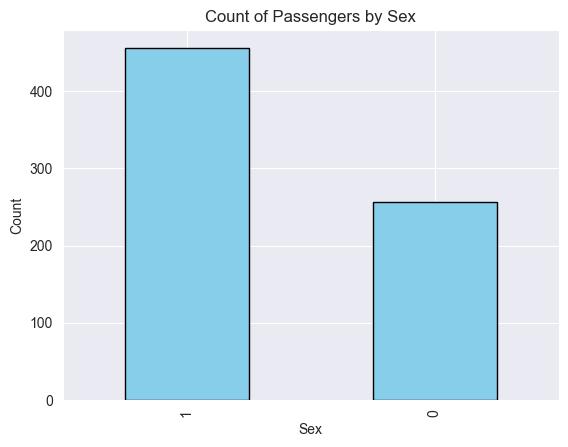

In [7]:
# Bar plot for 'Sex'
train_df['Sex'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Sex              0         1
Survived                    
0         0.146172  0.853828
1         0.686833  0.313167


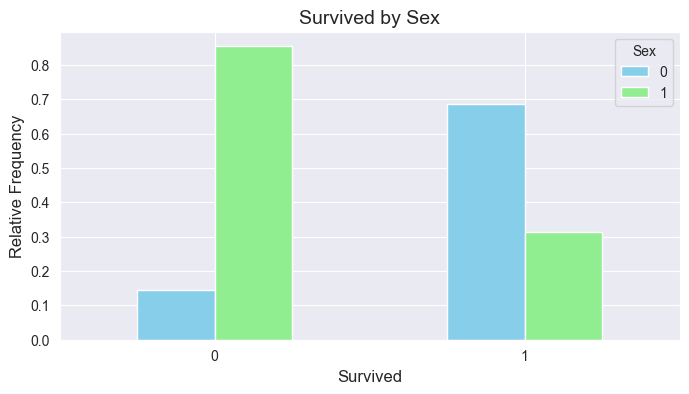

In [8]:
# Survived by sex - Cross Tabulation
ct_sexsur = pd.crosstab(train_df['Survived'], train_df['Sex'])
ct_sexsur_nml = pd.crosstab(train_df['Survived'], train_df['Sex'], normalize='index')
print(ct_sexsur_nml)

# Survived by sex - Bar plots
ct_sexsur_nml.plot(kind='bar', figsize=(8, 4), color=['skyblue', 'lightgreen'])
plt.title('Survived by Sex', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sex', fontsize=10)
plt.show()


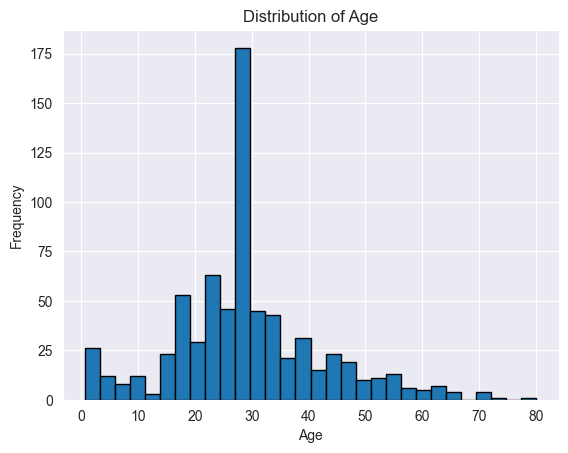

In [9]:
# Histogram for 'Age'
train_df['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Descriptive statistics for train_df
stats = train_df.describe()
print(stats)

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

In [11]:
# Info for train_df
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
None


In [12]:
# Shape for train_df
print(train_df.shape)

(712, 8)


# 12-9: Aviv Added correlation matrix heatmap

            Pclass       Sex       Age     SibSp     Parch      Fare  \
Pclass    1.000000  0.126986 -0.319927  0.093572  0.048225 -0.543722   
Sex       0.126986  1.000000  0.089108 -0.079976 -0.242467 -0.183650   
Age      -0.319927  0.089108  1.000000 -0.270404 -0.202725  0.071787   
SibSp     0.093572 -0.079976 -0.270404  1.000000  0.415491  0.136861   
Parch     0.048225 -0.242467 -0.202725  0.415491  1.000000  0.151631   
Fare     -0.543722 -0.183650  0.071787  0.136861  0.151631  1.000000   
Embarked  0.040708 -0.124908  0.031524 -0.049109 -0.072698  0.078197   
Survived -0.324024 -0.550699 -0.072729 -0.031052  0.074699  0.264345   

          Embarked  Survived  
Pclass    0.040708 -0.324024  
Sex      -0.124908 -0.550699  
Age       0.031524 -0.072729  
SibSp    -0.049109 -0.031052  
Parch    -0.072698  0.074699  
Fare      0.078197  0.264345  
Embarked  1.000000  0.099162  
Survived  0.099162  1.000000  


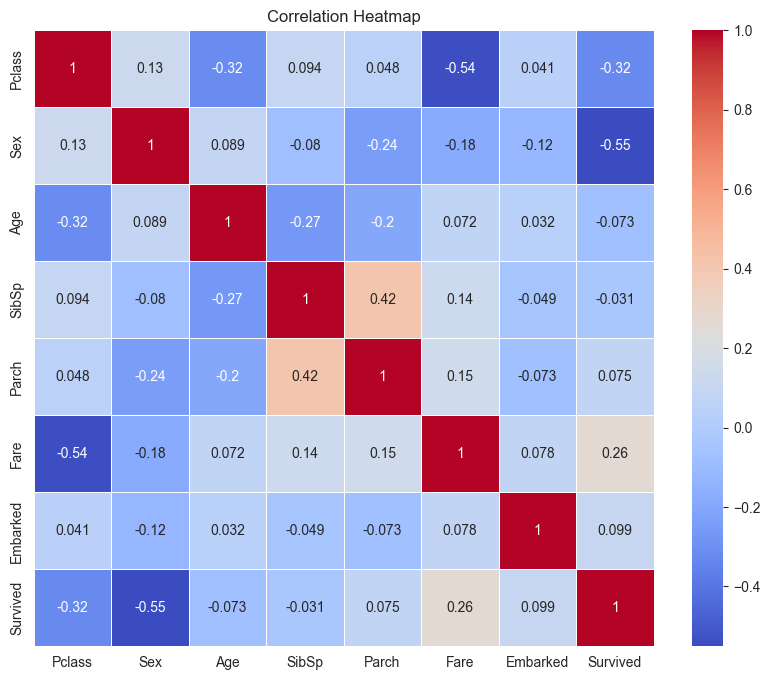

In [13]:
# Correlation matrix
correlation_matrix = train_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [14]:
# Extracting the target variable
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']

################################## Add another feature
################################## For each feature, Run one time with scaling, and one time without scaling, and compare results
# Aviv Adds Binning and classifier switching

In [15]:

# Feature Engineering method - 1 - Standard Scaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

# Feature engineering method - 2 - Binning
test_df_copy = test_df.copy()
train_df_copy = train_df.copy()

age_bin_values = [0, 18, 35, 55, 100]
# 1 - Child, 2 - Young Adult, 3 - Adult, 4 - Senior
age_bin_labels = [1, 2, 3, 4]

fare_bin_values = [-1, 10, 50, 100, 200, 1000]
# 1 - Low, 2 - Regular, 3 - High, 4 - Very High, 5 - VIP
fare_bin_labels = [1, 2, 3, 4, 5]

for data_frame in [test_df_copy, train_df_copy]:
    # Binning via age and fare, making them categorical
    data_frame['Age'] = pd.cut(data_frame['Age'], bins=age_bin_values, labels=age_bin_labels)
    data_frame['Fare'] = pd.cut(data_frame['Fare'], bins=fare_bin_values, labels=fare_bin_labels)

X_train_binned = train_df_copy.drop(labels=['Survived'], axis=1)
X_test_binned = test_df_copy.drop(labels=['Survived'], axis=1)

# Feature engineering method - 3 - Feature Creation
test_df_copy = test_df.copy()
train_df_copy = train_df.copy()

for data_frame in [test_df_copy, train_df_copy]:
    # Inferring whether person was travelling alone or not
    data_frame['relatives'] = data_frame['SibSp'] + data_frame['Parch']
    data_frame.loc[data_frame['relatives'] > 0, 'travelled_alone'] = 0
    data_frame.loc[data_frame['relatives'] == 0, 'travelled_alone'] = 1

X_train_new_feature = train_df_copy.drop(labels=['Survived'], axis=1)
X_test_new_feature = test_df_copy.drop(labels=['Survived'], axis=1)

scorer = make_scorer(f1_score)

# Setting up pipeline
pipeline = Pipeline([
    ('clf', None),
])

# Set up the parameters grid for GridSearchCV
parameters = [{
    'clf': [KNeighborsClassifier()],
    'clf__n_neighbors': [2, 3, 5, 7, 15, 30, 45, 64],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan'],
},
    {'clf': [DecisionTreeClassifier(random_state=42)],
     'clf__max_depth': [3, 5, 7],
     'clf__min_samples_split': [2, 5, 10],
     'clf__min_samples_leaf': [1, 2, 4]
     }
]



# Run grid_search_(KNN&TREE) with all features and without and get the best result

In [16]:
# Set up the grid search
result = []
for train, test in zip([X_train, X_train_scaled, X_train_binned, X_train_new_feature],
                       [X_test, X_test_scaled, X_test_binned, X_test_new_feature]):
    for params in parameters:
        saved_param = params['clf']
        #classifier
        clf = params['clf'][0]

        #getting arguments by
        #popping out classifier
        params.pop('clf')

        #pipeline
        steps = [('clf', clf)]

        #cross validation using
        #Grid Search
        grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=5, scoring=scorer)
        params['clf'] = saved_param

        grid.fit(train, y_train)

        #storing result
        result.append \
                (
                {
                    'grid': grid,
                    'classifier': grid.best_estimator_,
                    'best_score': grid.best_score_,
                    'best_params': grid.best_params_,
                    'cv': grid.cv,
                    'X_train': train,
                    'X_test': test
                }
            )

#sorting result by best score
sorted_scores = sorted(result, key=lambda d: d['best_score'], reverse=True)
best_scored = sorted_scores[0]

# Print the best parameters and the best score
print("Best parameters found:", best_scored["best_params"])
print("Best cross-validation accuracy:", best_scored["best_score"])

# Evaluate the best model on the test data
best_model = best_scored["classifier"]
test_score = best_model.score(best_scored['X_test'], y_test)
print("Test accuracy of the best model:", test_score)

Best parameters found: {'clf': DecisionTreeClassifier(random_state=42), 'clf__max_depth': 3, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2}
Best cross-validation accuracy: 0.7466195261267998
Test accuracy of the best model: 0.8324022346368715


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [17]:
prediction = best_model.predict(best_scored['X_test'])
best_model_score = f1_score(y_test, prediction)

print(f"F1 Score of best model: {best_model_score}")


F1 Score of best model: 0.7368421052631579


## Part 5 - Apply on test and show model performance estimation

In [18]:
# Predictions on test set
final_predictions = best_model.predict(best_scored['X_test'])

# Show first 5 predictions
print("First 5 predictions on test set:", final_predictions[:5])


First 5 predictions on test set: [0 0 0 1 0]


In [19]:
print("Summary of results:")
print(pd.DataFrame(
    [{"F1 Score": scored["best_score"], "Best Params": scored["best_params"]} for scored in sorted_scores]))


Summary of results:
   F1 Score                                        Best Params
0  0.746620  {'clf': DecisionTreeClassifier(random_state=42...
1  0.746395  {'clf': DecisionTreeClassifier(random_state=42...
2  0.746395  {'clf': DecisionTreeClassifier(random_state=42...
3  0.739407  {'clf': KNeighborsClassifier(), 'clf__metric':...
4  0.717128  {'clf': KNeighborsClassifier(), 'clf__metric':...
5  0.716117  {'clf': DecisionTreeClassifier(random_state=42...
6  0.658017  {'clf': KNeighborsClassifier(), 'clf__metric':...
7  0.644358  {'clf': KNeighborsClassifier(), 'clf__metric':...
